# VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the "Visual Geometry" Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014. To this day is it still considered to be an excellent vision model. 

The ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is an annual computer vision competition. Each year, teams compete on two tasks. The first is to detect objects within an image coming from 200 classes, which is called **object localization**. The second is to classify images, each labeled with one of 1000 categories, which is called **image classification**. VGG 16 was proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Group Lab of Oxford University in 2014 in the paper “VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION”. This model won the 1st  and 2nd place on the above categories in 2014 ILSVRC challenge. 

The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

In this notebook, we will try to implement the concept of Transfer Learning i.e. we will use this pre-trained model to predict and classify a number of images of cats and dogs. The major advantages of Transfer Learning are that it needs lesser training data and training time.

In [1]:
# First we import the necessary libraries

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using ImageDataGenerator for our training and testing images

gen= ImageDataGenerator(rescale=1./255)

traindata= gen.flow_from_directory(r"C:\Users\user\Downloads\Cat_Dog_Classification\train", target_size=(224,224))
testdata= gen.flow_from_directory(r"C:\Users\user\Downloads\Cat_Dog_Classification\test", target_size=(224,224))

Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Displaying a few images :

(350, 262)


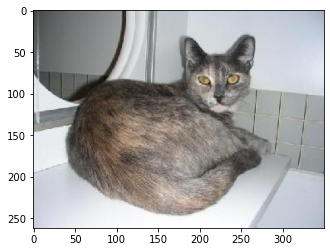

In [4]:
from tensorflow.keras.preprocessing import image
image1 = image.load_img(r'C:\Users\user\Downloads\Cat_Dog_Classification\train\Cat\30.jpg')
plt.imshow(image1)
print(image1.size)

(467, 457)


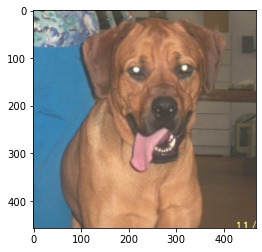

In [5]:
image2 = image.load_img(r'C:\Users\user\Downloads\Cat_Dog_Classification\train\Dog\30.jpg')
plt.imshow(image2)
print(image2.size)

In [10]:
# making an instance of VGG16 model
# include_top= False means that we are excluding the fully connected layers at the end which will be modified as per the problem
VGG = tensorflow.keras.applications.VGG16(input_shape= (224,224,3), include_top=False, weights='imagenet')

In [11]:
# we do not wish train the VGG16 model
VGG.trainable=False

In [12]:
# output layer has 2 nodes for binary classification
model= Sequential([VGG,
                  Flatten(),
                  Dense(units=256, activation='relu'),
                  Dense(units=256, activation='relu'),
                  Dense(units=2, activation='softmax'),
                  ])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
history= model.fit_generator(generator= traindata, validation_data= testdata, epochs= 5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
3/3 [==============================] - 56s 19s/step - loss: 3.3658 - accuracy: 0.5750 - val_loss: 0.4946 - val_accuracy: 0.7250
Epoch 2/5
3/3 [==============================] - 25s 8s/step - loss: 0.7553 - accuracy: 0.7000 - val_loss: 1.3029 - val_accuracy: 0.5250
Epoch 3/5
3/3 [==============================] - 25s 8s/step - loss: 0.2063 - accuracy: 0.9000 - val_loss: 0.5842 - val_accuracy: 0.7250
Epoch 4/5
3/3 [==============================] - 21s 7s/step - loss: 0.1824 - accuracy: 0.9125 - val_loss: 0.8036 - val_accuracy: 0.7250
Epoch 5/5
3/3 [==============================] - 21s 7s/step - loss: 0.0863 - accuracy: 0.9500 - val_loss: 0.2807 - val_accuracy: 0.8750


So we see that the training accuracy is 100% and the testing accuracy is 90%

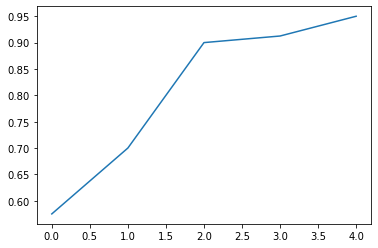

In [16]:
plt.plot(history.history["accuracy"])

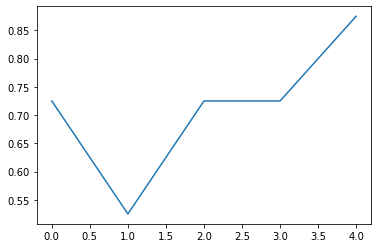

In [17]:
plt.plot(history.history["val_accuracy"])

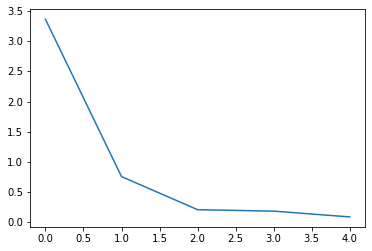

In [18]:
plt.plot(history.history["loss"])

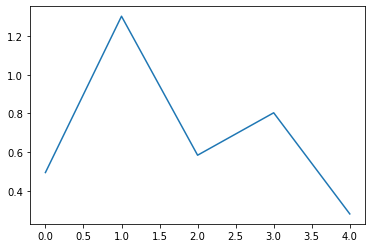

In [19]:
plt.plot(history.history["val_loss"])

# Testing

In [20]:
classes= ["cat","dog"]

In [31]:
from tensorflow.keras.preprocessing import image
img1= image.load_img(r"C:\Users\user\Downloads\Cat_Dog_Classification\validate_2.jpg",target_size=(224,224))

(224, 224, 3)


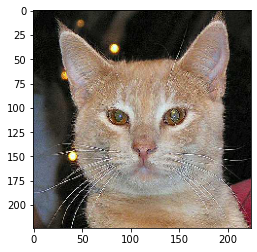

In [32]:
img1=np.asarray(img1)
#img1= image.img_to_array(img1)
plt.imshow(img1)
print(img1.shape)

In [33]:
img1= np.expand_dims(img1,axis=0)
print(img1.shape)

(1, 224, 224, 3)


In [41]:
pred1= model.predict(img1)
print("Result: ",classes[np.argmax(pred1)])
print(pred1)

Result:  cat
[[1. 0.]]


In [36]:
img2= image.load_img(r"C:\Users\user\Downloads\Cat_Dog_Classification\validate_1.jpg",target_size=(224,224))

(224, 224, 3)


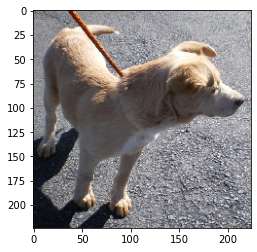

In [37]:
img2=np.asarray(img2)
plt.imshow(img2)
print(img2.shape)

In [38]:
img2= np.expand_dims(img2,axis=0)
print(img2.shape)

(1, 224, 224, 3)


In [44]:
pred2= model.predict(img2)
print("Result: ",classes[np.argmax(pred2)])
print(pred2)

Result:  dog
[[0. 1.]]


(224, 224, 3)


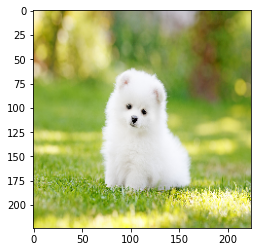

In [45]:
img3= image.load_img(r"C:\Users\user\Downloads\Images for sample\dog.jpg", target_size=(224,224,3))
img3= np.asarray(img3)
plt.imshow(img3)
print(img3.shape)

In [46]:
img3= np.expand_dims(img3,axis=0)
print(img3.shape)

(1, 224, 224, 3)


In [48]:
pred3= model.predict(img3)
print("Result: ",classes[np.argmax(pred3)])
print(pred3)

Result:  dog
[[1.590649e-37 1.000000e+00]]
